# Part I. Data Preprocess

In [ ]:
#import packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KernelDensity, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from statsmodels.stats.power import TTestIndPower
sns.set()
%matplotlib inline

In [ ]:
#import csv file to colab
#reference site: https://pythonviz.com/colab-jupyter/google-colab-notebook-file-io-csv-input-output/
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Medicalpremium.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
#Test for Normality
# Perform Shapiro-Wilk Test.
from scipy.stats import shapiro 
for col in df:
    print(col)
    s,p = shapiro(df.loc[:col])
    print(s,round(p,4))
    print()
    

Age
0.3397486209869385 0.0

Diabetes
0.3397486209869385 0.0

BloodPressureProblems
0.3397486209869385 0.0

AnyTransplants
0.3397486209869385 0.0

AnyChronicDiseases
0.3397486209869385 0.0

Height
0.3397486209869385 0.0

Weight
0.3397486209869385 0.0

KnownAllergies
0.3397486209869385 0.0

HistoryOfCancerInFamily
0.3397486209869385 0.0

NumberOfMajorSurgeries
0.3397486209869385 0.0

PremiumPrice
0.3397486209869385 0.0



/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df.corr(method='spearman')
#df.corr(method='pearson')

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210256,0.243568,-0.009745,0.051932,0.034130,-0.017407,-0.023232,-0.027035,0.382244,0.739088
Diabetes,0.210256,1.000000,0.127727,-0.036652,-0.089428,-0.000636,-0.017932,-0.080102,-0.055527,0.081205,0.086747
BloodPressureProblems,0.243568,0.127727,1.000000,-0.024538,0.045424,-0.041915,-0.059652,-0.011550,0.048239,0.267115,0.176418
AnyTransplants,-0.009745,-0.036652,-0.024538,1.000000,0.035285,-0.030327,0.002267,0.001876,-0.020171,-0.001065,0.217242
AnyChronicDiseases,0.051932,-0.089428,0.045424,0.035285,1.000000,0.052772,-0.028004,-0.027418,0.008666,0.022103,0.213103
Height,0.034130,-0.000636,-0.041915,-0.030327,0.052772,1.000000,0.074151,-0.013566,0.013885,0.032780,0.023128
Weight,-0.017407,-0.017932,-0.059652,0.002267,-0.028004,0.074151,1.000000,0.045903,-0.002849,-0.016895,0.129324
KnownAllergies,-0.023232,-0.080102,-0.011550,0.001876,-0.027418,-0.013566,0.045903,1.000000,0.115383,0.165178,0.018302
HistoryOfCancerInFamily,-0.027035,-0.055527,0.048239,-0.020171,0.008666,0.013885,-0.002849,0.115383,1.000000,0.277980,0.123982
NumberOfMajorSurgeries,0.382244,0.081205,0.267115,-0.001065,0.022103,0.032780,-0.016895,0.165178,0.277980,1.000000,0.289482


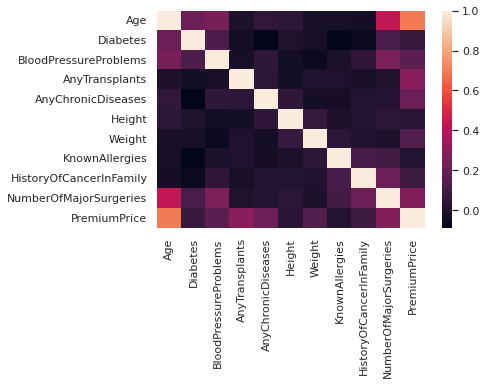

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(method='pearson'))

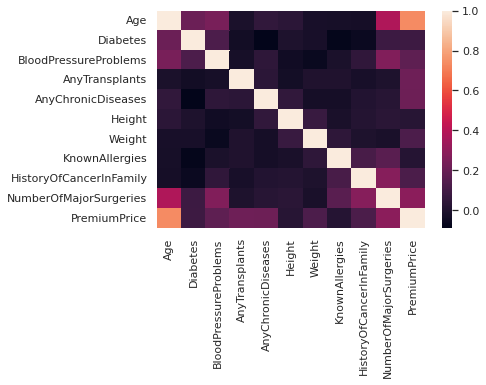

In [ ]:
sns.heatmap(df.corr(method='spearman'))

In [ ]:
# Compute Spearmann Correlation Coefficient (r) for each pair of variables
# Compute Pearson Correlation Coefficient (r) for each pair of variables
for col1 in df:
    corr_df = pd.DataFrame(columns = ['r', 'p'])
    for col2 in df:
        r , p = stats.spearmanr(df[col1], df[col2])
        #r , p = stats.pearsonr(df[col1], df[col2])
        corr_df.loc[col2] = [round(r,4),round(p,4)]
    print()
    print(col1)
    print(corr_df)


Age
                              r       p
Age                      1.0000  0.0000
Diabetes                 0.2103  0.0000
BloodPressureProblems    0.2436  0.0000
AnyTransplants          -0.0097  0.7599
AnyChronicDiseases       0.0519  0.1032
Height                   0.0341  0.2843
Weight                  -0.0174  0.5851
KnownAllergies          -0.0232  0.4662
HistoryOfCancerInFamily -0.0270  0.3964
NumberOfMajorSurgeries   0.3822  0.0000
PremiumPrice             0.7391  0.0000

Diabetes
                              r       p
Age                      0.2103  0.0000
Diabetes                 1.0000  0.0000
BloodPressureProblems    0.1277  0.0001
AnyTransplants          -0.0367  0.2502
AnyChronicDiseases      -0.0894  0.0050
Height                  -0.0006  0.9841
Weight                  -0.0179  0.5738
KnownAllergies          -0.0801  0.0119
HistoryOfCancerInFamily -0.0555  0.0814
NumberOfMajorSurgeries   0.0812  0.0107
PremiumPrice             0.0867  0.0064

BloodPressureProblems
  

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import random
scale = StandardScaler()
scaled = pd.DataFrame(scale.fit_transform(df))

random = random.seed(15020304) #N-number: 

x_train, x_test, y_train, y_test = train_test_split(scaled.iloc[:,:-1], scaled.iloc[:,-1], train_size=0.8,random_state=random)
print(x_train.shape, y_train.shape)

# LassoCV
lasso = LassoCV()
lasso.fit(x_train, y_train)
print(f'Optimal alpha: {lasso.alpha_}')

coef = dict()
for i in range(10):
  coef[df.columns[i]] = lasso.coef_[i]
print(f'coefficeints:\n{coef}')

y_pred = lasso.predict(x_test)
print(f'R^2: {lasso.score(x_test, y_test)}')
r2_lasso= lasso.score(x_test, y_test)
rmse_lasso = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'RMSE: {rmse_lasso}')

(788, 10) (788,)
Optimal alpha: 0.006680251316736516
coefficeints:
{'Age': 0.7650833722481887, 'Diabetes': -0.023712860274270352, 'BloodPressureProblems': 0.008346485975225734, 'AnyTransplants': 0.2803690402453835, 'AnyChronicDiseases': 0.18159281423985024, 'Height': -0.0014442342221032683, 'Weight': 0.1454148859516062, 'KnownAllergies': 0.037158703823464596, 'HistoryOfCancerInFamily': 0.11890259111914168, 'NumberOfMajorSurgeries': -0.07881623482400323}
R^2: 0.44745444883718166
RMSE: 0.6855614605657397


# Part II. Inference 

---

The motivation is to identify whether the premium price varies depending on certain variables. For example, I want to find if the premium price differs for customers with diabetes and customers without diabetes. To do so, I split the distribution into people with diabetes and people without diabetes, and use Welche's t-test to calculate the p-value. Using the alpha level of .05, I assess whether to reject or fail to reject the null hypothesis, which assumes that there is no difference in the distribution of the two group.



In [ ]:
def effect_size(df1, df2):
    std = np.sqrt(((df1.count() - 1)*df1.std()**2 + (df2.count() - 1)*df2.std()**2 )/(df1.count() + df2.count()))
    return (df1.mean() - df2.mean())/std

In [ ]:
alpha=.05
power=.8

In [ ]:
# Standardized premium price column
df['PremiumPrice']=(df['PremiumPrice']-df['PremiumPrice'].mean())/df['PremiumPrice'].std()

# Divide the distribution into two category. I divided into: 
# - people with diabetes or without diabetes,
# - people with ages above 50 and ages under 50, 
# - people with and without chronic disease, 
# - people who had no surgery and people with surgeries more than or equal to 1. 

diabetes_1 = df[(df['Diabetes'] == 1)]['PremiumPrice']
diabetes_0 = df[(df['Diabetes'] == 0)]['PremiumPrice']

age_above50 = df[df['Age'] >= 50]['PremiumPrice']
age_below50 = df[df['Age'] < 50]['PremiumPrice']

chronicDisease_1 = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
chronicDisease_0 = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']

had_surgeries = df[df['NumberOfMajorSurgeries'] > 0]['PremiumPrice']
no_surgery = df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice']

Surgery distribution

In [ ]:
# Power Analysis
effect_size_surgery = effect_size(had_surgeries, no_surgery)

# Perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size_surgery, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

had_surgeries.count(), no_surgery.count()

Sample size/Number needed in each group: 83.542


(507, 479)

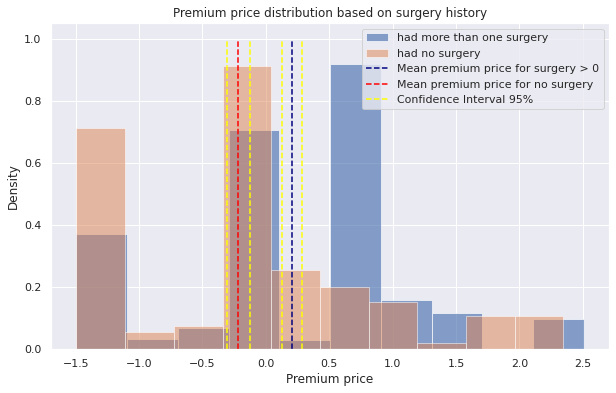

In [ ]:
plt.subplots(1, 1, figsize=(10,6))
        
plt.hist(had_surgeries.values, alpha=.65, label='had more than one surgery', density=True)
plt.hist(no_surgery.values, alpha=.5, label='had no surgery', density=True)

mean1 = had_surgeries.values.mean()
mean0 = no_surgery.values.mean()

plt.vlines(mean1, 0, 1, color='navy', ls='--', label='Mean premium price for surgery > 0')
plt.vlines(mean0, 0, 1, color='red', ls='--', label='Mean premium price for no surgery')

ci_no_surgery = stats.t.interval(1 - alpha, len(no_surgery) - 1, loc=np.mean(no_surgery), scale=stats.sem(no_surgery))
ci_surgery = stats.t.interval(1 - alpha, len(had_surgeries) - 1, loc=np.mean(had_surgeries), scale=stats.sem(had_surgeries))

plt.vlines(ci_no_surgery[0], 0, 1, color='yellow', ls='--', label='Confidence Interval 95%')
plt.vlines(ci_no_surgery[1], 0, 1, color='yellow', ls='--')

plt.vlines(ci_surgery[0], 0, 1, color='yellow', ls='--')
plt.vlines(ci_surgery[1], 0, 1, color='yellow', ls='--')

plt.xlabel('Premium price')
plt.ylabel('Density')
plt.title('Premium price distribution based on surgery history')
plt.legend()

In [ ]:
statistics, pval = stats.ttest_ind(no_surgery, had_surgeries, equal_var=False)
print("The p-value from using Welche's t-test is: ", pval)
s = ("Since our p-value is under the alpha level, \n" 
    "we deem the result to be statistically significant" 
    "and thus we reject the null hypothesis. \n\n"
    "There is a difference in premium price based on surgery history.")
print(s)

The p-value from using Welche's t-test is:  1.6004191669602734e-11
Since our p-value is under the alpha level, 
we deem the result to be statistically significantand thus we reject the null hypothesis. 

There is a difference in premium price based on surgery history.


Diabetes distribution

In [ ]:
# Power Analysis
effect_size_diabete = effect_size(diabetes_1, diabetes_0)

# Perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size_diabete, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))
print('Sample size of each group: {:.3f}, {:.3f}'.format(diabetes_1.count(), diabetes_0.count()))

Sample size/Number needed in each group: 655.499
Sample size of each group: 414.000, 572.000


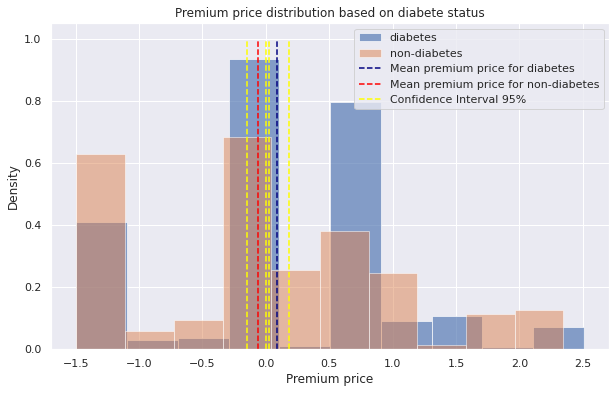

In [ ]:
# Plot
plt.subplots(1, 1, figsize=(10,6))
        
plt.hist(diabetes_1.values, alpha=.65, label='diabetes', density=True)
plt.hist(diabetes_0.values, alpha=.5, label='non-diabetes', density=True)

mean1 = diabetes_1.values.mean()
mean0 = diabetes_0.values.mean()

plt.vlines(mean1, 0, 1, color='navy', ls='--', label='Mean premium price for diabetes')
plt.vlines(mean0, 0, 1, color='red', ls='--', label='Mean premium price for non-diabetes')

ci_diabetes = stats.t.interval(1 - alpha, len(diabetes_1) - 1, loc=np.mean(diabetes_1), scale=stats.sem(diabetes_1))
ci_no_diabetes = stats.t.interval(1 - alpha, len(diabetes_0) - 1, loc=np.mean(diabetes_0), scale=stats.sem(diabetes_0))

plt.vlines(ci_diabetes[0], 0, 1, color='yellow', ls='--', label='Confidence Interval 95%')
plt.vlines(ci_diabetes[1], 0, 1, color='yellow', ls='--')

plt.vlines(ci_no_diabetes[0], 0, 1, color='yellow', ls='--')
plt.vlines(ci_no_diabetes[1], 0, 1, color='yellow', ls='--')

plt.xlabel('Premium price')
plt.ylabel('Density')
plt.title('Premium price distribution based on diabete status')
plt.legend()

In [ ]:
statistics, pval = stats.ttest_ind(diabetes_1, diabetes_0, equal_var=False)
pval

0.014508142994631957

Age distribution

In [ ]:
# Power Analysis
effect_size_age = effect_size(age_above50, age_below50)

# Perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size_age, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))
print('Sample size of each group: {:.3f}, {:.3f}'.format(age_above50.count(), age_below50.count()))

Sample size/Number needed in each group: 12.365
Sample size of each group: 316.000, 670.000


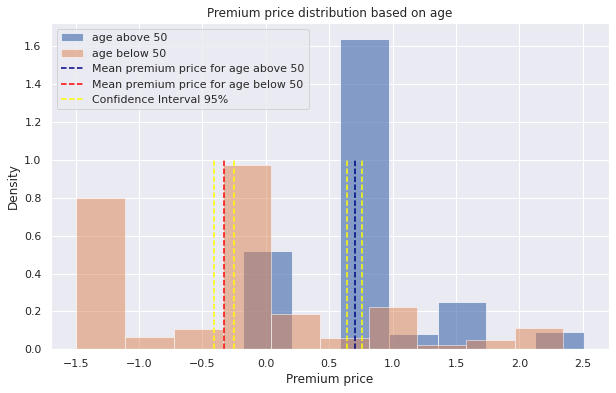

In [ ]:
plt.subplots(1, 1, figsize=(10,6))
        
plt.hist(age_above50.values, alpha=.65, label='age above 50', density=True)
plt.hist(age_below50.values, alpha=.5, label='age below 50', density=True)

mean1 = age_above50.values.mean()
mean0 = age_below50.values.mean()

plt.vlines(mean1, 0, 1, color='navy', ls='--', label='Mean premium price for age above 50')
plt.vlines(mean0, 0, 1, color='red', ls='--', label='Mean premium price for age below 50')

ci_age_above50 = stats.t.interval(1 - alpha, len(age_above50) - 1, loc=np.mean(age_above50), scale=stats.sem(age_above50))
ci_age_below50 = stats.t.interval(1 - alpha, len(age_below50) - 1, loc=np.mean(age_below50), scale=stats.sem(age_below50))

plt.vlines(ci_age_above50[0], 0, 1, color='yellow', ls='--', label='Confidence Interval 95%')
plt.vlines(ci_age_above50[1], 0, 1, color='yellow', ls='--')

plt.vlines(ci_age_below50[0], 0, 1, color='yellow', ls='--')
plt.vlines(ci_age_below50[1], 0, 1, color='yellow', ls='--')

plt.xlabel('Premium price')
plt.ylabel('Density')
plt.title('Premium price distribution based on age')
plt.legend()

In [ ]:
statistics, pval = stats.ttest_ind(age_above50, age_below50, equal_var=False)
pval

5.584386824151368e-82

Chronic disease distribution

In [ ]:
# Power Analysis
effect_size_chronic = effect_size(chronicDisease_1, chronicDisease_0)

# Perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=effect_size_chronic, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))
print('Sample size of each group: {:.3f}, {:.3f}'.format(chronicDisease_1.count(), chronicDisease_0.count()))

Sample size/Number needed in each group: 52.019
Sample size of each group: 178.000, 808.000


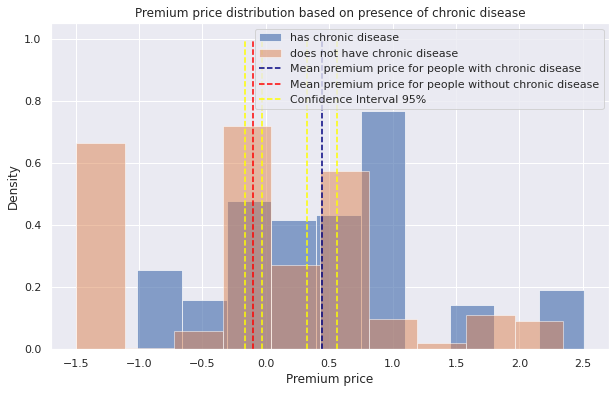

In [ ]:
plt.subplots(1, 1, figsize=(10,6))
        
plt.hist(chronicDisease_1.values, alpha=.65, label='has chronic disease', density=True)
plt.hist(chronicDisease_0.values, alpha=.5, label='does not have chronic disease', density=True)

mean1 = chronicDisease_1.values.mean()
mean0 = chronicDisease_0.values.mean()

plt.vlines(mean1, 0, 1, color='navy', ls='--', label='Mean premium price for people with chronic disease')
plt.vlines(mean0, 0, 1, color='red', ls='--', label='Mean premium price for people without chronic disease')

ci_chronicDisease_1 = stats.t.interval(1 - alpha, len(chronicDisease_1) - 1, loc=np.mean(chronicDisease_1), scale=stats.sem(chronicDisease_1))
ci_chronicDisease_0 = stats.t.interval(1 - alpha, len(chronicDisease_0) - 1, loc=np.mean(chronicDisease_0), scale=stats.sem(chronicDisease_0))

plt.vlines(ci_chronicDisease_1[0], 0, 1, color='yellow', ls='--', label='Confidence Interval 95%')
plt.vlines(ci_chronicDisease_1[1], 0, 1, color='yellow', ls='--')

plt.vlines(ci_chronicDisease_0[0], 0, 1, color='yellow', ls='--')
plt.vlines(ci_chronicDisease_0[1], 0, 1, color='yellow', ls='--')

plt.xlabel('Premium price')
plt.ylabel('Density')
plt.title('Premium price distribution based on presence of chronic disease')
plt.legend()

In [ ]:
statistics, pval = stats.ttest_ind(chronicDisease_1, chronicDisease_0, equal_var=False)
pval

1.7279736467738168e-13

# Part III. Prediction

In [ ]:
#Reference: https://machinelearninghd.com/ridgecv-regression-python/
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Checking the data, if there is multicollinearity.

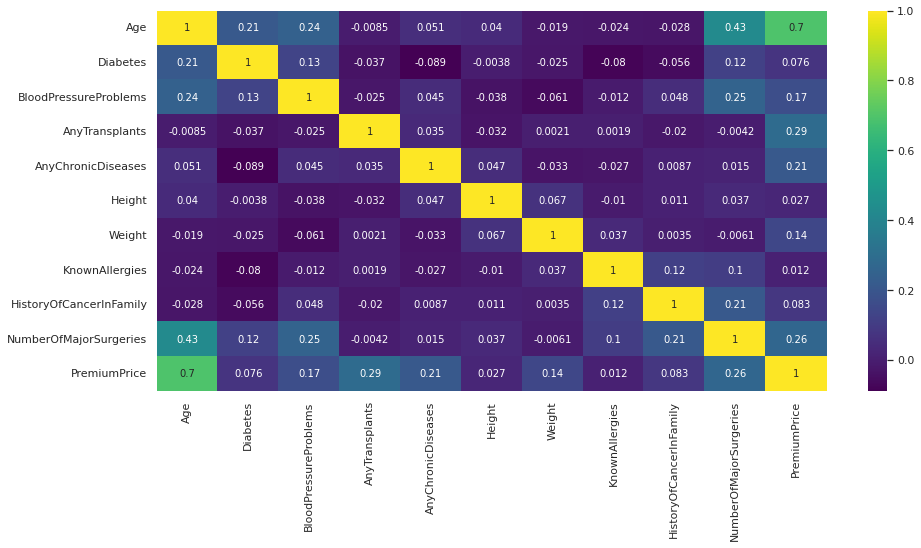

In [ ]:
#Checking the data, if there is multicollinearity.
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import random
scale = StandardScaler()
scaled = pd.DataFrame(scale.fit_transform(df))

random = random.seed(15020304) #N-number: 

# x_feature = pd.concat([scaled.iloc[:,0:5],scaled.iloc[:,6:-1]],axis=1) #eliminate height
x_train, x_test, y_train, y_test = train_test_split(scaled.iloc[:,:-1], scaled.iloc[:,-1], train_size=0.8,random_state=random) #all features
# x_train, x_test, y_train, y_test = train_test_split(x_feature, scaled.iloc[:,-1], train_size=0.8,random_state=random)
print(x_train.shape, y_train.shape)

# LassoCV
lasso = LassoCV()
lasso.fit(x_train, y_train)
print(f'Optimal alpha: {lasso.alpha_}')

coef = dict()
for i in range(10):
  coef[df.columns[i]] = lasso.coef_[i]
print(f'coefficeints:\n{coef}')

y_pred = lasso.predict(x_test)

print(f'R^2: {lasso.score(x_test, y_test)}')
r2_lasso= lasso.score(x_test, y_test)
rmse_lasso = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'RMSE: {rmse_lasso}')

# print(f'R^2: {lasso.score(x_test, y_test)}')
# r2_lasso_2= lasso.score(x_test, y_test)
# rmse_lasso_2 = np.sqrt(mean_absolute_error(y_test,y_pred))
# print(f'RMSE: {rmse_lasso}')


NameError: ignored

In [ ]:
# define evaluation
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

#Define Ridge Regression Model
# define model
model = Ridge()
model.fit(x_train,y_train)

#Predicting the Model
y_pred = model.predict(x_test)

#Evaluating the model
coef_ridge = model.coef_
r2_ridge = r2_score(y_test,y_pred)
rmse_ridge = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'R^2:{r2_score(y_test,y_pred)}')
print(f'coefficeints:\n{coef_ridge}')
print(f'RMSE:{rmse_ridge}')



R^2:0.656315814552458
coefficeints:
[ 0.7212701  -0.03870345 -0.00753982  0.27379273  0.16992837 -0.01338331
  0.14321575  0.01019987  0.12229436 -0.06555523]
RMSE:0.6819480615196064


In [ ]:
#Find the best parameters through GridsearchCV
#define parameters
param = {
    # 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'alpha':np.arange(0.00001, 20, 0.1),
    'fit_intercept':[True,False],
    # 'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [ ]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6146982615857066
Best Hyperparameters: {'alpha': 5.80001, 'fit_intercept': False, 'solver': 'saga'}


In [ ]:
model = Ridge(alpha=result.best_params_['alpha'],fit_intercept = result.best_params_['fit_intercept'], solver = result.best_params_['solver'])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
coef_ridge = model.coef_
r2_ridge = r2_score(y_test,y_pred)
rmse_ridge = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'R^2:{r2_score(y_test,y_pred)}')
print(f'coefficeints:\n{coef_ridge}')
print(f'RMSE:{rmse_ridge}')

# r2_ridge_2 = r2_score(y_test,y_pred)
# rmse_ridge_2 = np.sqrt(mean_absolute_error(y_test,y_pred))
# print(f'R^2:{r2_score(y_test,y_pred)}')
# print(f'coefficeints:\n{coef_ridge}')
# print(f'RMSE:{np.sqrt(mean_absolute_error(y_test,y_pred))}')



R^2:0.6564426459002899
coefficeints:
[ 0.71503724 -0.03792233 -0.00683376  0.27181878  0.16911837 -0.01333198
  0.14255641  0.01024928  0.12081478 -0.06265153]
RMSE:0.6835475685128266


In [ ]:
#Elastic Net
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
coef_elas = model.coef_
r2_elas = r2_score(y_test,y_pred)
rmse_elas = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'R^2:{r2_elas}')
print(f'coefficeints:\n{coef_elas}')
print(f'RMSE:{rmse_elas}')


R^2:0.6107066664147088
coefficeints:
[ 0.59915912 -0.          0.          0.21563315  0.1210059  -0.
  0.08456231  0.          0.05427041 -0.        ]
RMSE:0.7102218716481385


In [ ]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

parametersGrid = {"max_iter": [1, 5, 10],
                  'alpha':np.arange(0.00001, 20, 0.1),
                      # "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

grid = GridSearchCV(model, parametersGrid, scoring='r2', cv=10)
grid.fit(x_train, y_train)
grid.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.9, 'max_iter': 5}

In [ ]:
#Elastic Net
model = ElasticNet(alpha=grid.best_params_['alpha'], l1_ratio=grid.best_params_['l1_ratio'])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
coef_elas = model.coef_
# r2_elas = r2_score(y_test,y_pred)
# rmse_elas = np.sqrt(mean_absolute_error(y_test,y_pred))
# print(f'R^2:{r2_elas}')
# print(f'coefficeints:\n{coef_elas}')
# print(f'RMSE:{rmse_elas}')


r2_elas_2 = r2_score(y_test,y_pred)
rmse_elas_2 = np.sqrt(mean_absolute_error(y_test,y_pred))
print(f'R^2:{r2_score(y_test,y_pred)}')
print(f'coefficeints:\n{coef_elas}')
print(f'RMSE:{np.sqrt(mean_absolute_error(y_test,y_pred))}')

R^2:0.6564868463603981
coefficeints:
[ 0.72257139 -0.03887566 -0.00769092  0.27411079  0.17007747 -0.01346643
  0.14342978  0.01026752  0.12260306 -0.06621026]
RMSE:0.6817578493322018


In [ ]:
model_assessment = pd.DataFrame(columns=df.columns[:-1])
model_assessment.loc['Lasso'] = coef
model_assessment.loc['Ridge'] = coef_ridge
model_assessment.loc['ElasticNet'] = coef_elas
model_assessment['R^2'] = [r2_lasso,r2_ridge,r2_elas]
model_assessment['RMSE'] = [rmse_lasso,rmse_ridge,rmse_elas]
model_assessment = model_assessment.round(5)

In [ ]:
model_assessment

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,R^2,RMSE
Lasso,0.69825,-0.03035,-0.00000,0.26542,0.16072,-0.00151,0.13253,0.00000,0.10899,-0.04595,0.65229,0.68522
Ridge,0.71504,-0.03792,-0.00683,0.27182,0.16912,-0.01333,0.14256,0.01025,0.12081,-0.06265,0.65644,0.68355
ElasticNet,0.72257,-0.03888,-0.00769,0.27411,0.17008,-0.01347,0.14343,0.01027,0.12260,-0.06621,0.61071,0.71022


In [ ]:
model_assessment.to_csv('/content/drive/MyDrive/Data/model_assessment.csv')

In [ ]:
model_assessment2 = pd.DataFrame(index = ['Lasso', 'Ridge','Elastic Net'])
model_assessment2['R^2'] = [r2_lasso,r2_ridge,r2_elas]
model_assessment2['RMSE'] = [rmse_lasso,rmse_ridge,rmse_elas]
model_assessment2['updated R^2'] = [r2_lasso_2,r2_ridge_2,r2_elas_2]
model_assessment2['updated RMSE'] = [rmse_lasso_2,rmse_ridge_2,rmse_elas_2]
model_assessment2 = model_assessment2.round(4)
model_assessment2

NameError: ignored

In [ ]:
plt.scatter(['Lasso', 'Ridge', 'Elastic Net'], model_assessment2['R^2'], color='blue',label='R^2')
plt.scatter(['Lasso', 'Ridge', 'Elastic Net'], model_assessment2['updated R^2'], color='orange',label='updated R^2')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Part IV. Classification

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve

In [ ]:
s = StandardScaler()
temp = df
s.fit(temp[['Age', 'Height', 'Weight', 'PremiumPrice']])
new = s.transform(temp[['Age', 'Height', 'Weight', 'PremiumPrice']]).T
temp.Age = new[0]
temp.Height = new[1]
temp.Weight = new[2]
temp.PremiumPrice = new[3]

In [ ]:
X_col = df.columns.drop('Diabetes')
X = df[X_col]
x_train, x_test, y_train, y_test = train_test_split(X, df.Diabetes, train_size=0.8, random_state=15020304)

In [ ]:
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
pca = PCA()
pca.fit(X)
eigval = pca.explained_variance_
n = 10
x = np.arange(1,11)
plt.bar(x, eigval, color='navy', alpha=0.6)
plt.hlines(1.0,0,11, color='orange')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xticks(ticks=x)
plt.text(7,1.1,'Kaiser Criterion Line', color='orange')
plt.show()
print(f'Variance explained by the first 2 PC above is: {sum(pca.explained_variance_ratio_[:2])}')

In [ ]:
# Use Silhouette Score to find the optimal k for k-means
opt_pca = PCA(n_components=2)
newX = opt_pca.fit_transform(X)
s = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(newX)
    cID = kmeans.labels_
    s.append(silhouette_score(newX, cID))

plt.plot(np.arange(2,11), s)
plt.xlabel('number of clusters for K-Means')
plt.ylabel('mean silhouette score')
plt.show()

In [ ]:
# optimize k-means with clusters of 2
opt_kmeans = KMeans(n_clusters=2)
opt_kmeans.fit(newX)
labels = opt_kmeans.labels_

In [ ]:
# plot premium by labels
newX = newX.T
sns.scatterplot(newX[0][np.where(labels==0)[0]],newX[1][np.where(labels==0)[0]])
sns.scatterplot(newX[0][np.where(labels==1)[0]],newX[1][np.where(labels==1)[0]])

plt.xlabel('principle component [1]')
plt.ylabel('principle component [2]')
plt.show()

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}

xgb = XGBClassifier(objective='binary:logistic')
grid = GridSearchCV(xgb, param_grid, scoring='roc_auc')
grid.fit(X, df.Diabetes)

print(grid.best_score_)
print(grid.best_params_)

In [ ]:
opt_xgb = XGBClassifier(objective='binary:logistic', **grid.best_params_)
opt_xgb.fit(x_train, y_train)

conf_matrix = confusion_matrix(y_test, opt_xgb.predict(x_test))
dsip = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1])
dsip.plot()
plt.title('Confusion Matrix')
plt.show()

probs = opt_xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
random_classifier=np.linspace(0.0, 1.0, 100)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="purple")
plt.plot(random_classifier, random_classifier, 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()
print(f'feature importance: {opt_xgb.feature_importances_} \nArea under ROC curve: {auc(fpr, tpr)}')